Importação de Pacotes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Conectando ao driver
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


 Leitura da Base

In [ ]:
# https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling
clientes_registros = pd.read_csv("bases/bank_cli.csv",sep=",")
print('Base de dados lida')

Base de dados lida


Análise Exploratória de Dados (EDA)

In [ ]:
# Visualizando as dimensões (linhas, colunas)
clientes_registros.shape

(10000, 14)

In [ ]:
# Quem são as colunas?
clientes_registros.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# Visualizando os primeiros registros
clientes_registros.head(5)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

Aula 05 - Estatística Descritiva

In [ ]:
# Exemplo: Qual é a quantidade de clientes por sexo (MASCULINO e FEMININO)?

In [ ]:
# Visualizando apenas a única coluna de interesse. Note que podemos plotar um gráfico com essa informação.
agrupamento_sexo = clientes_registros.groupby("Gender")["Gender"].count()
agrupamento_sexo

Gender
Female    4543
Male      5457
Name: Gender, dtype: int64

In [ ]:
# Calculando os percentuais por sexo? Ajustando melhor a visualização do número percentual.
qtde_total = len(clientes_registros)
qtde_masc = clientes_registros.groupby("Gender")["Gender"].count()[1]
qtde_fem = clientes_registros.groupby("Gender")["Gender"].count()[0]
print(f"O percentual de FEMININO é {qtde_fem/qtde_total * 100}")
print("O percentual de MASCULINO é %.2f " % (qtde_masc/qtde_total * 100))

O percentual de FEMININO é 45.43
O percentual de MASCULINO é 54.57 


In [ ]:
agrupamento_sexo.values

array([4543, 5457])

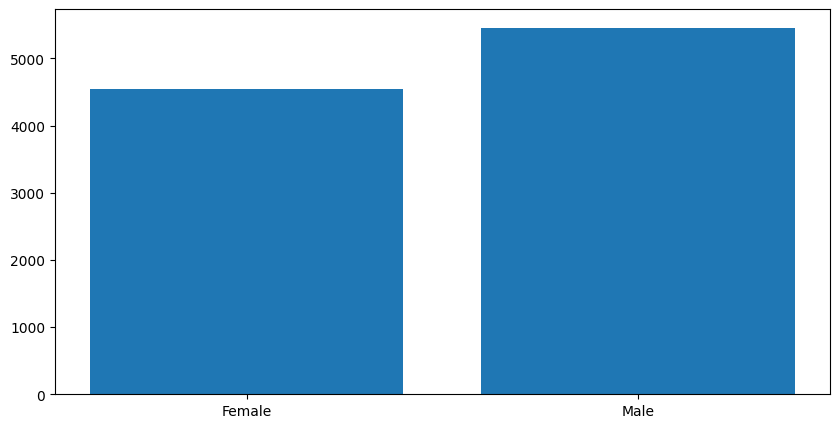

In [ ]:
# PLOTANDO INFORMAÇÕES
# 1 Criando uma figura. Largura e altura em polegadas.
fig = plt.figure(figsize = (10, 5))
# 2 Criando o gráfico x, altura
valor_x = agrupamento_sexo.index
valor_altura = agrupamento_sexo.values
plt.bar(valor_x, valor_altura)
# 3 Mostrando
plt.show()

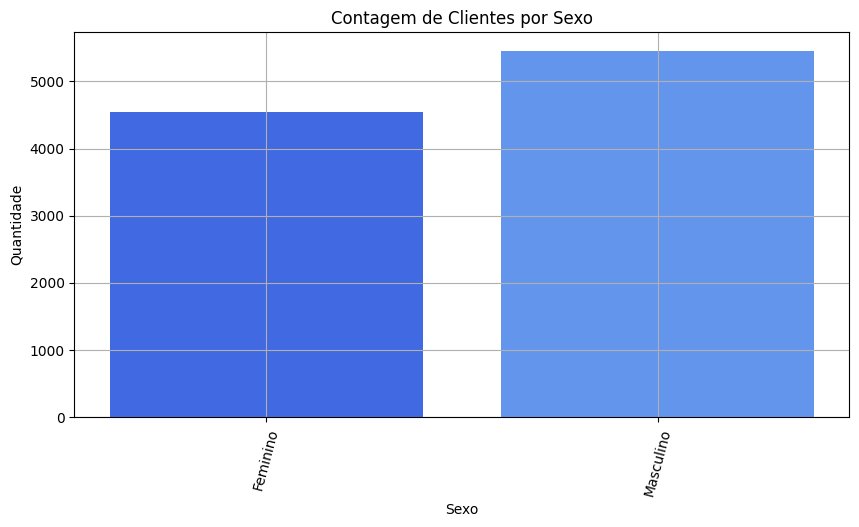

In [ ]:
# PLOTANDO INFORMAÇÕES - PERSONALIZANDO
# 1 Criando uma figura. Largura e altura em polegadas.
fig = plt.figure(figsize = (10, 5))
# Traduzindo o Sexo para Português
agrupamento_sexo.index = ['Feminino','Masculino']
# 2 Criando o gráfico x, altura
valor_x = agrupamento_sexo.index
valor_altura = agrupamento_sexo.values
# Color, pode usar o nome da cor.
# https://matplotlib.org/stable/gallery/color/named_colors.html
plt.bar(valor_x, valor_altura,color=('royalblue', 'cornflowerblue'))
# 3 Personalizando
plt.title("Contagem de Clientes por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Quantidade")
plt.xticks(rotation = 75)
plt.grid()
# 4 Mostrando
plt.show()

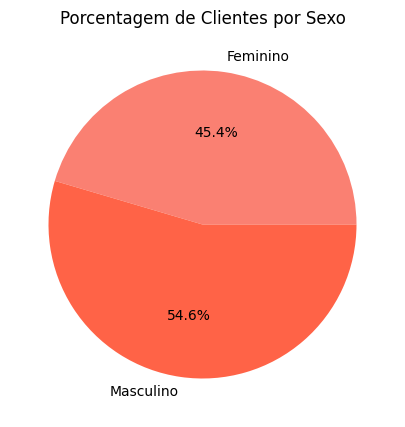

In [ ]:
# Gráfico de pizza
fig = plt.figure(figsize = (10, 5))
agrupamento_sexo.index = ['Feminino','Masculino']
# autopct mostra a porcentagem
mycolors = ['salmon', 'tomato']
plt.pie(x = agrupamento_sexo.values, labels = agrupamento_sexo.index,autopct='%1.1f%%',colors = mycolors)
plt.title("Porcentagem de Clientes por Sexo")
plt.show()

In [ ]:
# Qual a quantidade de clientes únicos?
clientes_registros['CustomerId'].nunique()

10000

In [ ]:
# Saber quais são os clientes únicos?
clientes_registros['CustomerId'].unique()

array([15634602, 15647311, 15619304, ..., 15584532, 15682355, 15628319])

In [ ]:
# Visualizando apenas a única coluna de interesse. Note que podemos plotar um gráfico com essa informação.
clientes_unicos = clientes_registros.drop_duplicates(subset=['CustomerId'])
agrupamento_sexo_regiao_cli_unicos = clientes_registros.groupby(["Geography","Gender"])['RowNumber'].count()
agrupamento_sexo_regiao_cli_unicos

Geography  Gender
France     Female    2261
           Male      2753
Germany    Female    1193
           Male      1316
Spain      Female    1089
           Male      1388
Name: RowNumber, dtype: int64

In [ ]:
agrupamento_sexo_regiao_cli_unicos.values

array([2261, 2753, 1193, 1316, 1089, 1388])

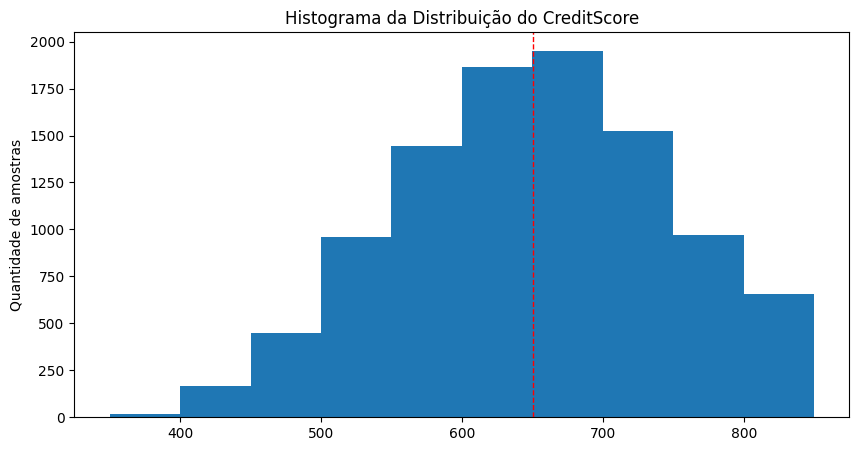

Média Aritmética de CreditScore:  650.5288
Valor mínimo de CreditScore:  350
Valor máximo de CreditScore:  850


In [ ]:
# Distribuição de dados do CreditScore
fig = plt.figure(figsize = (10, 5))
plt.hist(clientes_registros['CreditScore'])
plt.title("Histograma da Distribuição do CreditScore")
plt.ylabel('Quantidade de amostras')
plt.axvline(clientes_registros['CreditScore'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()
print('Média Aritmética de CreditScore: ',clientes_registros['CreditScore'].mean())
print('Valor mínimo de CreditScore: ',clientes_registros['CreditScore'].min())
print('Valor máximo de CreditScore: ',clientes_registros['CreditScore'].max())

In [ ]:
clientes_registros.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

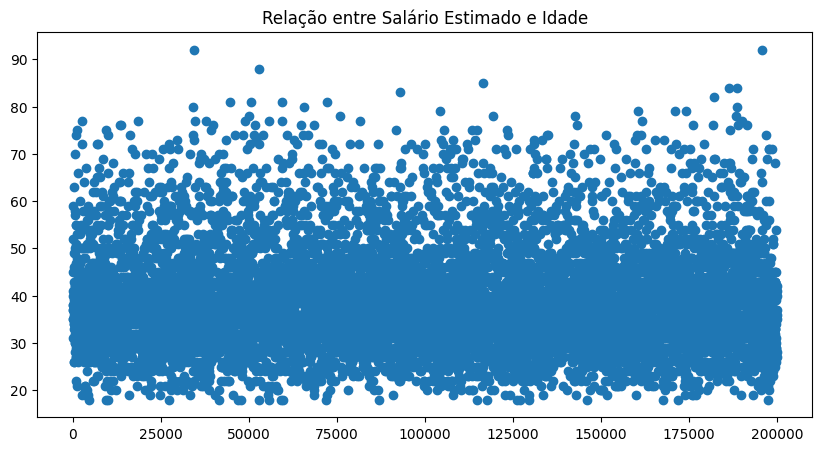

In [ ]:
# Gráfico de dispersão: EstimatedSalary e Age
fig = plt.figure(figsize = (10, 5))

plt.scatter(x = clientes_registros['EstimatedSalary'], y = clientes_registros['Age'])
plt.title("Relação entre Salário Estimado e Idade")
plt.show()

In [ ]:
# Será que a medida que avança a idade, o salário tende a ser maior?
# Calculando o índice de correlação de Person.
clientes_registros[['EstimatedSalary','Age']].corr()

EstimatedSalary       Age
EstimatedSalary         1.000000 -0.007201
Age                    -0.007201  1.000000

Múltiplos Gráficos </br>
Podemos usar a função subplot ()

In [ ]:
clientes_registros.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
clientes_registros['Balance']

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

In [ ]:
agrupamento_balanco_max_idade = clientes_registros.groupby(["Age"])['Balance'].max()
agrupamento_balanco_max_idade

Age
18    176139.50
19    166133.28
20    204223.03
21    210433.08
22    186788.96
        ...    
83    123356.63
84     92242.34
85         0.00
88         0.00
92    126076.24
Name: Balance, Length: 70, dtype: float64

In [ ]:
agrupamento_balanco_max_idade.index

Int64Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
            88, 92],
           dtype='int64', name='Age')

In [ ]:
agrupamento_balanco_max_idade.values

array([176139.5 , 166133.28, 204223.03, 210433.08, 186788.96, 197715.93,
       182705.05, 193858.2 , 214346.96, 197041.8 , 200724.96, 209490.21,
       205770.78, 186796.37, 206663.75, 208165.53, 204017.4 , 211774.31,
       206329.65, 212778.2 , 250898.09, 207034.96, 221532.8 , 200117.76,
       222267.63, 212696.32, 193213.02, 187841.99, 190678.02, 198546.1 ,
       213146.2 , 204510.94, 201009.64, 186825.57, 191665.21, 199689.49,
       187997.15, 180075.22, 209767.31, 238387.56, 216109.88, 190353.08,
       185648.56, 183997.7 , 167026.61, 169832.57, 175754.87, 151659.52,
       182532.23, 158719.57, 183555.24, 187013.13, 148745.92, 183135.39,
       160541.  , 170241.7 , 186445.31, 126273.95, 160979.68, 149083.7 ,
       151675.65, 108078.56,      0.  , 122029.15,      0.  , 123356.63,
        92242.34,      0.  ,      0.  , 126076.24])

In [ ]:
agrupamento_balanco_medio_idade = clientes_registros.groupby(["Age"])['Balance'].mean()
agrupamento_balanco_medio_idade

Age
18     79169.57500
19     70502.53963
20     76038.89000
21     75926.88283
22     68213.74881
          ...     
83    123356.63000
84     90057.86500
85         0.00000
88         0.00000
92    123794.77500
Name: Balance, Length: 70, dtype: float64

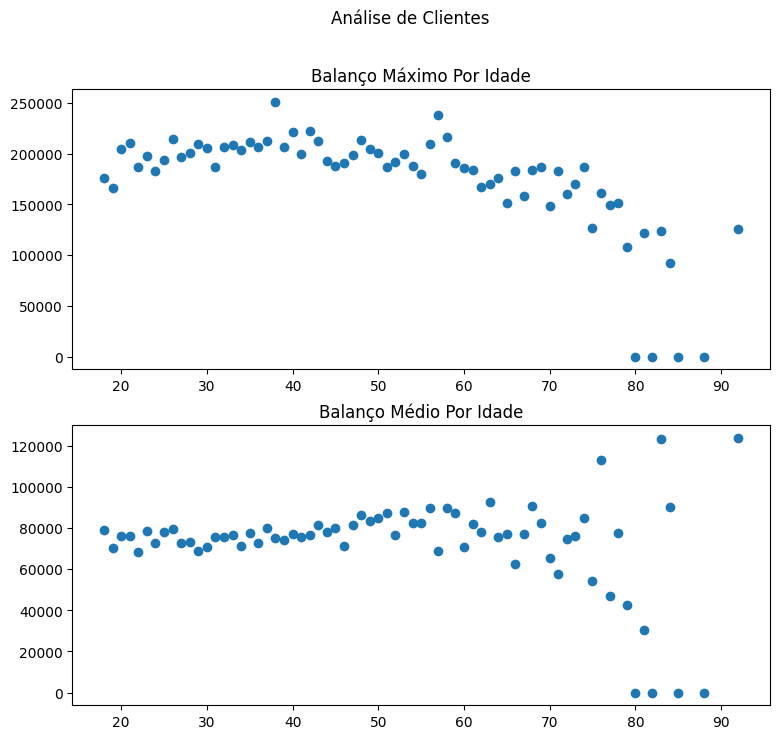

In [ ]:
# Opção número 1
# NÚMERO DE LINHAS (padrão 1), COLUNAS
plt.rcParams["figure.figsize"] = (9,8) # isso se aplica a todos que forem ser criados

fig, axs = plt.subplots(2)
fig.suptitle('Análise de Clientes')

axs[0].set_title('Balanço Máximo Por Idade')
axs[0].scatter(agrupamento_balanco_max_idade.index,agrupamento_balanco_max_idade.values)


axs[1].set_title('Balanço Médio Por Idade')
axs[1].scatter(agrupamento_balanco_medio_idade.index,agrupamento_balanco_medio_idade.values)
plt.show()

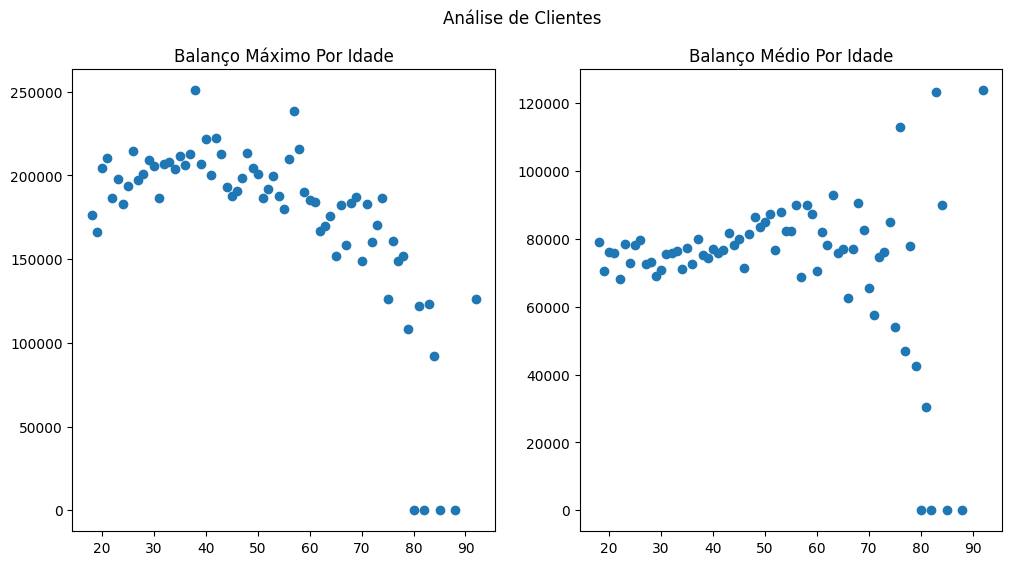

In [ ]:
# Opção número 2
# NÚMERO DE LINHAS (padrão 1), COLUNAS
plt.rcParams["figure.figsize"] = (12,6)

fig, axs = plt.subplots(1, 2)
fig.suptitle('Análise de Clientes')

axs[0].set_title('Balanço Máximo Por Idade')
axs[0].scatter(agrupamento_balanco_max_idade.index,agrupamento_balanco_max_idade.values)


axs[1].set_title('Balanço Médio Por Idade')
axs[1].scatter(agrupamento_balanco_medio_idade.index,agrupamento_balanco_medio_idade.values)
plt.show()

In [ ]:
agrupamento_sexo = clientes_registros.groupby("Gender")["Gender"].count()
agrupamento_sexo.index = ['Feminino','Masculino']
agrupamento_sexo

Feminino     4543
Masculino    5457
Name: Gender, dtype: int64

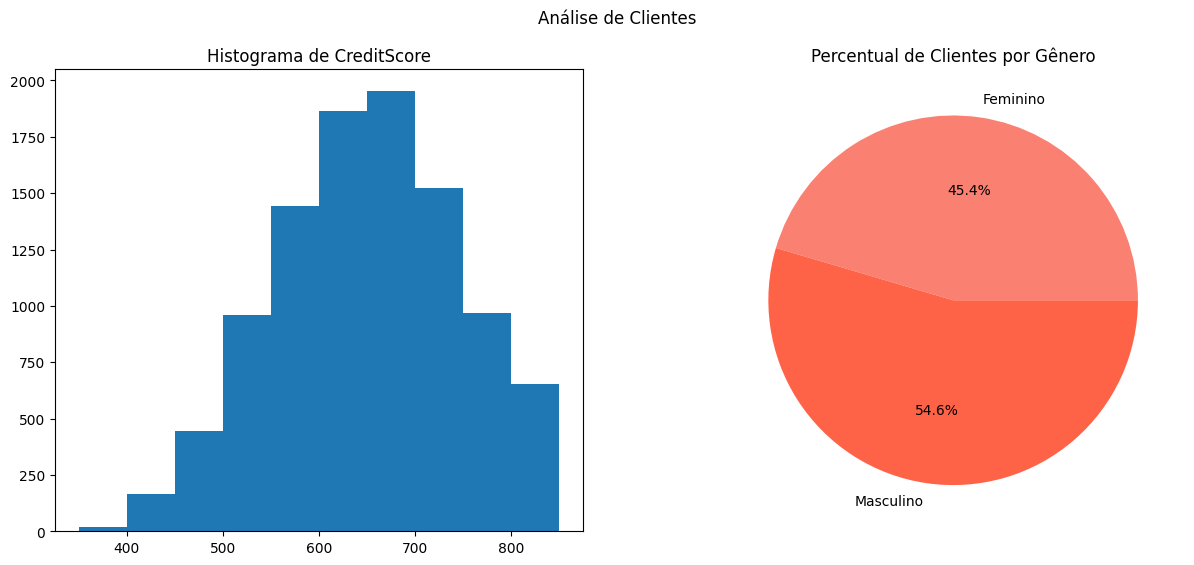

In [ ]:
# Com nossos gráficos, como seria?
plt.rcParams["figure.figsize"] = (15,6)

fig, axs = plt.subplots(1, 2)
fig.suptitle('Análise de Clientes')

axs[0].set_title('Histograma de CreditScore')
axs[0].hist(clientes_registros['CreditScore'])

mycolors = ['salmon', 'tomato']
axs[1].set_title('Percentual de Clientes por Gênero')
axs[1].pie(x = agrupamento_sexo.values, labels = agrupamento_sexo.index,autopct='%1.1f%%',colors = mycolors)
plt.show()

In [ ]:
# E como PowerBI? Exemplo rápido.

EXERCÍCIO PRÁTICO


Responda as seguintes perguntas:
1 - Quantos clientes únicos são membros ativos e quantos não são?
2 - Gere um arquivo csv com todos os membros ativos.
3 - Gere gráficos auxiliares e adequados para mostrar a informação 1.
4 - Qual a distribuição dos salários dos clientes? Calcule as estatísticas básicas: média, mínimo, máximo, mediana, desvio padrão.
5 - Gere um gráfico de distribuição dos salários dos clientes distribuindo em duas partes: primeiro apenas o sexo feminino, outro para o sexo masculino. Posicione um do lado do outro na figura gerada.

In [ ]:
clientes_registros.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')